## Tracking a single particle in a beamline.

These exercises are meant to get familiar with how to construct simple beamlines and to track single particles.

#### Setup of your Python kernel
Let's load our standard library functions, and setup matplotlib for nice inline plots

In [1]:
# Import custom tracking functions and useful libraries
from tracking_library import *

# Set up plotting
%matplotlib inline
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### Exercise 6
Recall that the **imaging equation** for a lens is $1/b+1/g=1/f,$ which corresponds to a system of one focusing lens with focal length $f,$ sandwiched between drift spaces with lengths $b$ and $g$.

1. Write a beamline description that corresponds to this system, with, for example, $b=3$ m and $g=2$ m.
2. Prove that the particles starting with a random angle $x'_0$ and zero position $x$ are focused back to the end of such a system.
   
   **Hint:** you can create a random ensample of particles with such properties as
   
   `X = np.array([np.zeros(n_particles),np.random.randn(n_particles)])`

   where `n_particles` is the numbers of particles you want to generate.

4. (Optional) Try to change the position of the quadrupole, i.e. $b$, while keeping fixed the total length of the imaging system (i.e. $b+g=5$ m). Plot both position and angle trajectory for one particle with $x=0$ and $x'_0=1$ mrad for different values of $b$, and show that, with an approriate change of $f$, this particle is always focused back to $x=0$ at the end of system, but what happens to the angle?

   **Hint:** for this exercise it is useful to make a small animation with the `interactive` package. 

#### SOLUTION 1

In [2]:
# code here your solution...
# our parameters and beamline description
b = 3
g = 2
f = 1/(1/b+1/g)
beamline = D(b) + Q(f) + D(g)

#### SOLUTION 2

Text(0, 0.5, 'x [mm]')

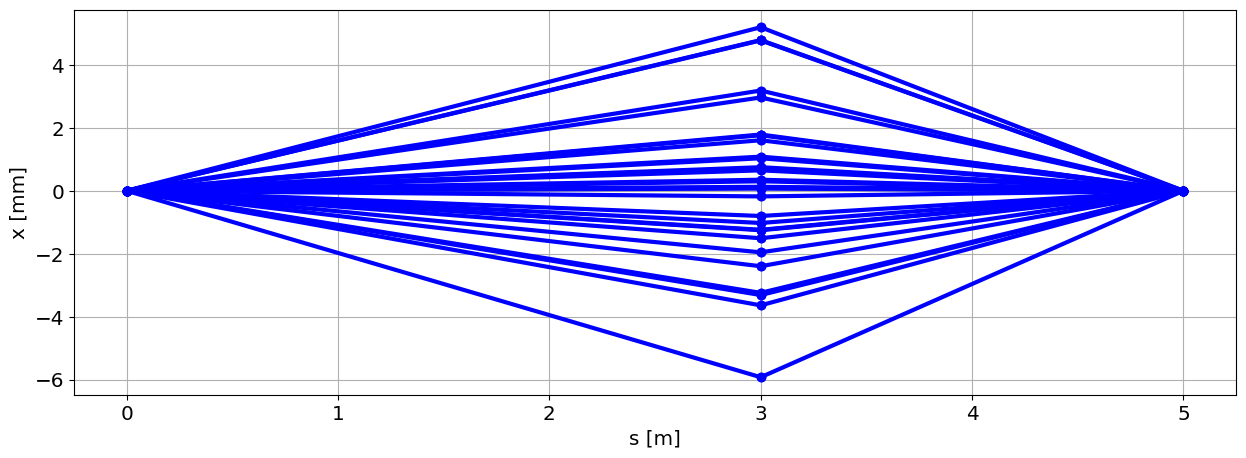

In [3]:
# define several particles with a random angle and zero position
n_particles = 30
X = np.array([np.zeros(n_particles),
              np.random.randn(n_particles)])
# track the particles and plot the output
transported_particles = transportParticles(X, beamline)

plt.plot(transported_particles['s'], transported_particles['x'], 'o-b', lw=3)
plt.grid(True)
plt.xlabel('s [m]')
plt.ylabel('x [mm]')

#### SOLUTION 3

We can do a small animation showing that, moving the position of the quadruple and keeping fulfilled the imaging equation the particle entering with x=0 will exit with x=0.

We will see that the closer will be the quadrupole to the end of the system, the larger will be the angle.

In [4]:
# we define the function to be-executed at every change of `b`:
def plotIt(b):
    L = 5
    g = L-b
    f = 1/(1/b+1/g)
    beamline = D(b) + Q(f) + D(g)

    X = np.array([[0],[1]])
    transported_particles = transportParticles(X, beamline)

    plt.plot(transported_particles['s'], transported_particles['x'], 'o-b', lw=3)
    plt.grid(True)
    plt.xlabel('s [m]')
    plt.ylabel('x [mm]', color='b')
    plt.tick_params(axis='y', labelcolor='b')
    plt.ylim([-1,4.5])

    # Note: After having plotted $x$ trajectory on a plot, one can create a second vertical axis that shares the same horizontal axis with `plt.twinx()`
    ax2 = plt.twinx()  
    plt.ylabel("x' [mrad]", color='r')
    plt.tick_params(axis='y', labelcolor='r')
    plt.plot(transported_particles['s'], transported_particles['xp'], 's-r', lw=3)
    plt.ylim([-5,5])

# create the interactive plot with a range of `b` parameter
interactive_plot = interactive(plotIt,b=(0.1,4.9,.1),continuous_update=True)
output = interactive_plot.children[-1]
output.layout.height = '350px'
display(interactive_plot)

interactive(children=(FloatSlider(value=2.5000000000000004, description='b', max=4.9, min=0.1), Output(layout=…

### Exercise 7

Define a **FODO beamline** that **starts in the middle of a drift**. 
Then, model a particle that is on the optical axis, but has an initial angle $x' = 1$ mrad and plot the position $x$ along the beam line.
For the moment, we can define arbitrarily the $f$ and $L$ parameters: we chose 2.5 m and 1 m, respectively. 

**Hint 1:** A FODO cell is one of the most fundamental lattice topologies. Look back at [Wolfgan's lecture](https://indico.cern.ch/event/1117526/contributions/4978192/). 
As in [Wolfgan's lecture](https://indico.cern.ch/event/1117526/contributions/4978192/), we define $L$ as the length of one drift, i.e. the total length of the cell ($L_{FODO}$) is $2L$. 

<p align="center">
<img src=./_img_exercises/slide_fodo.png width="60%">
</p>

**Hint 2:** To better visualize the trajectory of the particle(s), always split the drifts in several shorter drifts (e.g. $10$ drifts, each $L/10$ long).

#### SOLUTION 
The first part of the exercise is to define a FODO cell structure.  In its simpler version, it consists on two thin quadrupoles of opposite focal length, f, spaced by two drifts of length L (2*L is the total length of the cell). 

We could start the FODO from an arbitrary point inside it, but we decided to start describing it from the center of a drift.

We also suggest to split the drift in small drifts, say 0.1 m long each.

In [5]:
# build your beamline here...
f = 2.5
L = 1
beamline = 5*D(L/10)+Q(f)+10*D(L/(10))+Q(-f)+5*D(L/10)

We can now proceed to generate a particle and transport it along the beamline:

Text(0.5, 1.0, 'Exercise 7')

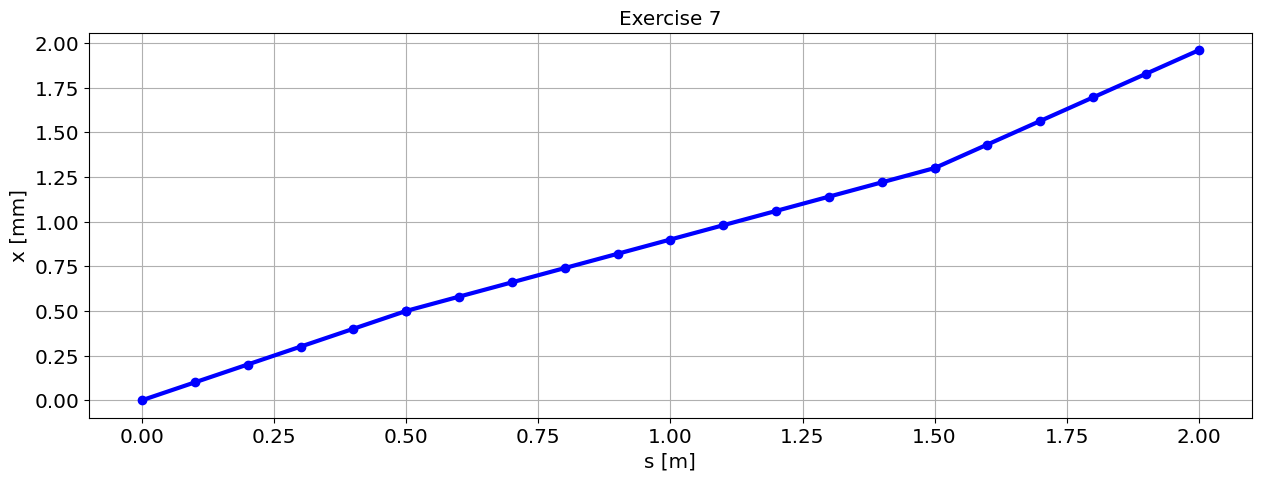

In [6]:
# track and plot the particle trajectory here...
X = np.array([[0],
              [1]])

transported_particles = transportParticles(X, beamline)
plt.plot(transported_particles['s'], transported_particles['x'], 'o-b', lw=3)
plt.grid(True)
plt.xlabel('s [m]')
plt.ylabel('x [mm]')
plt.title('Exercise 7')

### Exercise 8
Plot the angle $x'$ along the beam line.

#### SOLUTION

Text(0.5, 1.0, 'Exercise 8')

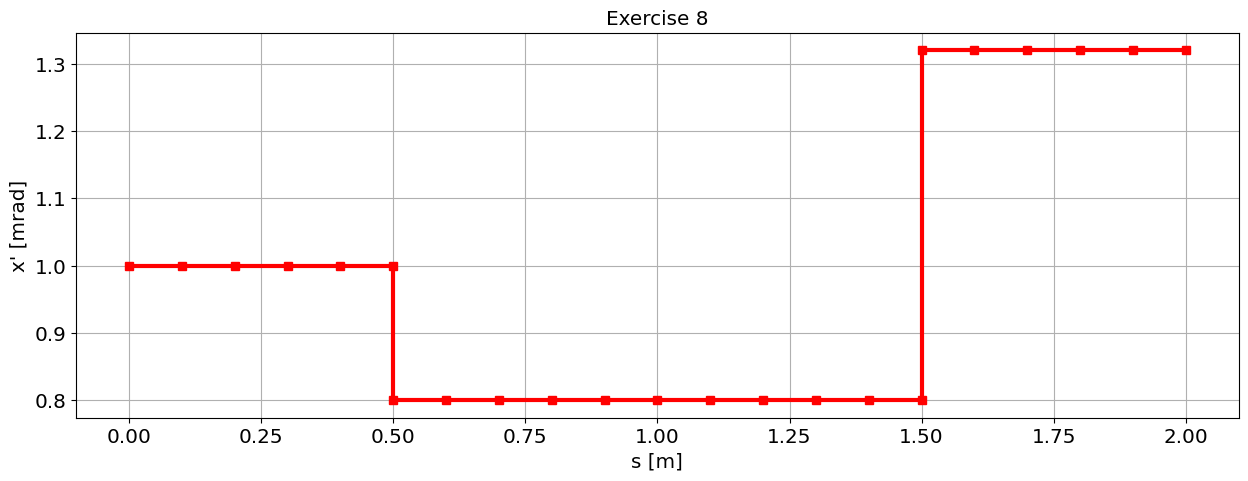

In [7]:
# code here your solution...
plt.plot(transported_particles['s'], transported_particles['xp'], 's-r', lw=3)
plt.grid(True)
plt.xlabel('s [m]')
plt.ylabel("x' [mrad]")
plt.title('Exercise 8')

### Exercise 9

Plot both the position $x$ and the angle $x'$ through five cells.

**Hint:** After having plotted $x$ trajectory on a plot, one can create a second vertical axis that shares the same horizontal axis with `plt.twinx()`

#### SOLUTION

Text(0.5, 1.0, 'Exercise 9')

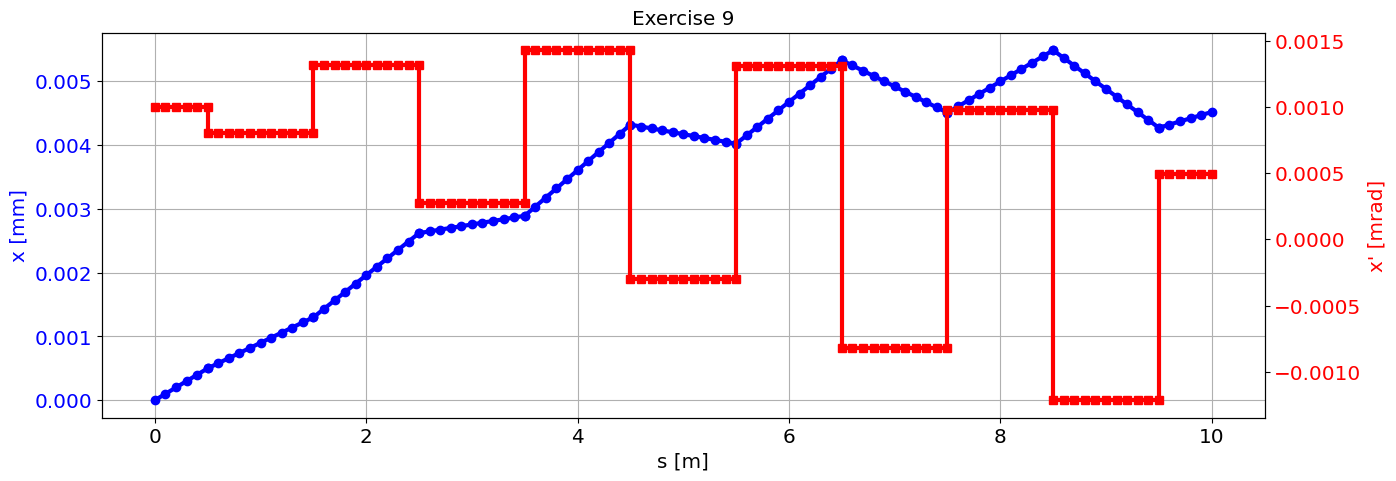

In [8]:
# code here your solution...
X = np.array([[0],[0.001]])

# the transport over 5 cell can be achieved simply by multiplying the beamline description by 5
transported_particles = transportParticles(X, 5*beamline)
    
plt.plot(transported_particles['s'], transported_particles['x'], 'o-b', lw=3)
plt.grid(True)
plt.xlabel('s [m]')
plt.ylabel('x [mm]', color='b')
plt.tick_params(axis='y', labelcolor='b')

# instantiate a second axes that shares the same x-axis, and color it in red
plt.twinx()  
plt.ylabel("x' [mrad]", color='r')
plt.tick_params(axis='y', labelcolor='r')
# plot the angle as well:
plt.plot(transported_particles['s'], transported_particles['xp'], 's-r', lw=3)
plt.title('Exercise 9')

### Exercise 10

Plot the position $x$ and angle $x'$ through 100 cells, play with different values of the focal length $f$ and explore whether you can make the oscillations grow.

**Hint:** Look back at [Wolfgan's lecture](https://indico.cern.ch/event/1117526/contributions/4978192/):

<p align="center">
<img src=./_img_exercises/slide_stability.png width="60%">
</p>

#### SOLUTION

Text(0.5, 1.0, 'Exercise 10')

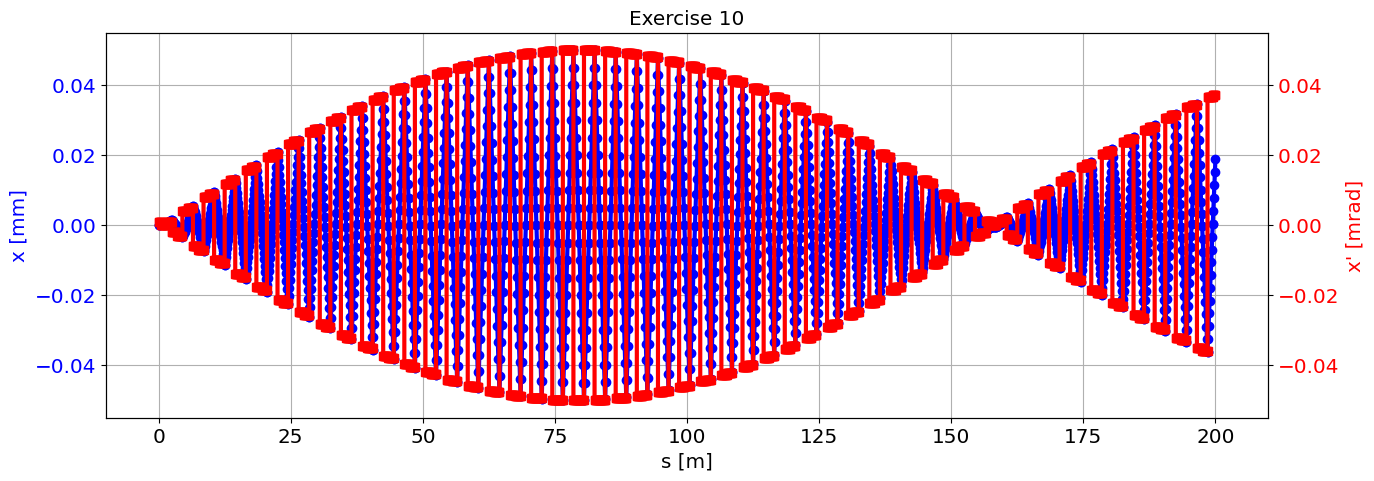

In [9]:
# code here your solution...
f = .5001
L = 1
beamline = 5*D(L/10)+Q(f)+10*D(L/(10))+Q(-f)+5*D(L/10)


X = np.array([[0],
              [0.001]])
transported_particles = transportParticles(X, 100*beamline)

plt.plot(transported_particles['s'], transported_particles['x'], 'o-b', lw=3)
plt.grid(True)
plt.xlabel('s [m]')
plt.ylabel('x [mm]', color='b')
plt.tick_params(axis='y', labelcolor='b')

# instantiate a second axes that shares the same x-axis
ax2 = plt.twinx()
plt.ylabel("x' [mrad]", color='r')
plt.tick_params(axis='y', labelcolor='r')
plt.plot(transported_particles['s'], transported_particles['xp'], 's-r', lw=3)
plt.title('Exercise 10')

It it important to observe that when the focal length approaches the stability limit (only for $f>L_{FODO}/4$ the machine is stable), then the oscillation start to grow during the transport in the lattice.